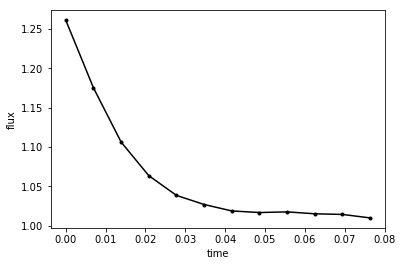

In [76]:
import numpy as np
import matplotlib.pyplot as plt

data = np.transpose(np.loadtxt('229614158_PDCSAP_SC6.txt',delimiter=','))
# optical light curve from a flaring M-dward star observed by the HESS telescope
# source : Matt Lundy
# first column = time
# second column = flux
# third colum -> ignore

# Set left and right time values to slice the data
a = 1706.52314133376
b = 1706.60647466709

inda = np.where(data[0] == a)
indb = np.where(data[0] == b)
t = data[0][int(inda[0]): int(indb[0]):] - a # time starts at 0
y = data[1][int(inda[0]): int(indb[0]):]

plt.clf()
plt.plot(t, y, 'k.-')
#plt.xlim(left=0, right=b-a)
plt.xlabel("time")
plt.ylabel("flux")
plt.show()

In [99]:
from scipy import optimize

def test_fun(x, N, lam):
    return N*np.exp(-lam*x)


params, params_covariance = optimize.curve_fit(test_fun, t, y, p0=[1.25, 0.3])

plt.clf()
plt.plot(t, test_fun(t, params[0], params[1]),label='Fitted function')
plt.plot(t, y, 'k.-')
#plt.xlim(left=0, right=b-a)
plt.xlabel("time")
plt.ylabel("flux")
plt.show()

ValueError: operands could not be broadcast together with shapes (12,) (0,) 

In [92]:
def exponential_decay(t, p): # p = ([N0, lamda])
    
    N = len(t)
    new_y = np.zeros(N)
    for i in range (N):
        new_y[i] = p[0] * np.exp(-p[1]*t[i])
    
    plt.plot(t, new_y)
    grad = np.zeros([t.size, p.size])
    grad[:,0] = np.exp(-p[1] * t)
    grad[:,1] = -p[1]*p[0]*np.exp(-p[1] * t)
    return new_y, grad

In [75]:
p = np.zeros([2,1]) # p - initial guess
p[0,0] = 1.25 # N0
p[1,0] = 0.3 # lamda
num_iterations = 1

# Am^T*N^-1*Am*dm=Am^T*N^-1*r
# m0 -> m0 + dm
for i in range(num_iterations):
    y_pred, Am = exponential_decay(t,p)
    r = y - y_pred # d-A(m)->r
    err=(r**2).sum()
    r = np.matrix(r)
    r = np.transpose(r)
    Am = np.matrix(Am)
    
    lhs = Am.transpose()*Am # Am^T*N^-1*Am
    rhs = np.dot(Am.transpose(), r) # Am^T*N^-1*r
    print(lhs)
    dm = np.dot(np.linalg.inv(lhs), rhs)
    p = p+dm
    
    print(p)
    print(err)
    print('\n')

plt.plot(t, y, 'k.-')
#plt.plot(t,y_pred)
plt.xlabel("time")
plt.ylabel("flux")
plt.show()

[[ 9.81494974 -3.68060615]
 [-3.68060615  1.38022731]]


LinAlgError: Singular matrix